In [10]:
import numpy as np
import EigenPro2.mnist as mnist
import math
import matplotlib.pyplot as plt
import random
import time
import math
import pandas as pd
from sklearn.metrics import mean_squared_error
(train_x, train_y), (test_x, test_y) = mnist.load()
aug=30
delta=0.2 #noise level
y=6
x=3

#def K(x,y):
   # return np.dot(x,y)+1/20*(np.dot(x,y))**2

Load MNIST dataset.
60000 train samples
10000 test samples


In [12]:
print(train_x[1].shape)


(784,)


In [2]:
def Ker(X,Y):
    x=np.sum(np.square(X),axis=1)
    y=np.sum(np.square(Y),axis=1)
    x=x.reshape(len(x),1)
    y=y.reshape(len(y),1)
    temp1=x.repeat(len(y),axis=1)
    temp2=y.repeat(len(x),axis=1)
    squ=temp1+np.transpose(temp2)-2*np.matmul(X,np.transpose(Y))
    mat=np.exp(-squ/784)# kernel bandwith 1,100,200,784
    return mat

170498071/170498071 [==============================] - 12s 0us/step


y=7
x=2
time1=time.time()
A = [train_x[train_y==i,:] for i in range(9)]

temp = np.concatenate((A[x], A[y]), axis=0)
rdn_indexes1=np.random.randint(len(temp),size=300)

train1=temp[rdn_indexes1,:] #no augmentation training set
y1=np.ones(len(A[x]))
y2=np.ones(len(A[y]))*(-1)

ytemp=np.concatenate((y1,y2))
ytrain1=ytemp[rdn_indexes1]
    
#rdn_indexes2=np.random.randint(len(temp),size=10000)    
#train2=temp[rdn_indexes2,:]
#ytrain2=ytemp[rdn_indexes2]

    
P=np.random.uniform(0,1,size=(aug,len(train1),784))
temp2=train1+delta*P
temp2=np.array([temp2]).reshape(aug*len(train1), 784)
    
train = temp2 #augmentation training set
 
Ytrain=np.tile(ytrain1,aug)

  
    
B= [test_x[test_y==i,:] for i in range(9)]

test = np.concatenate((B[x],B[y]),axis=0)

n=len(test)
y1=np.ones(len(B[x]))
y2=np.ones(len(B[y]))*(-1)
Ytest=np.concatenate((y1,y2))
time2=time.time()
print('Adding augmentation=',time2-time1)

In [3]:
A = [train_x[train_y==i,:] for i in range(9)]

temp = np.concatenate((A[x], A[y]), axis=0)
rdn_indexes1=np.random.randint(len(temp),size=100)

train1=temp[rdn_indexes1,:] #no augmentation training set
y1=np.ones(len(A[x]))
y2=np.ones(len(A[y]))*(-1)

ytemp=np.concatenate((y1,y2))
ytrain1=ytemp[rdn_indexes1]
    
#rdn_indexes2=np.random.randint(len(temp),size=10000)    
#train2=temp[rdn_indexes2,:]
#ytrain2=ytemp[rdn_indexes2]

    


  
    
B= [test_x[test_y==i,:] for i in range(9)]

test = np.concatenate((B[x],B[y]),axis=0)

n=len(test)
y1=np.ones(len(B[x]))
y2=np.ones(len(B[y]))*(-1)
Ytest=np.concatenate((y1,y2))


In [4]:


z=[10**(-14),10**(-13),10**(-12),10**(-11),10**(-10), 10**(-9),10**(-8),10**(-7),10**(-6),10**(-5),10**(-4)]
error=[]
for R in z:
    print('R=',R)
    MIS=np.zeros(30)
    for a in range(30):
        P=np.random.normal(0,1,size=(aug,len(train1),784))
        temp2=train1+delta*P
        temp2=np.array([temp2]).reshape(aug*len(train1), 784)
    
        train = temp2 #augmentation training set
 
        Ytrain=np.tile(ytrain1,aug)
        b=Ker(test,train)
        k1=Ker(train,train)
        n=len(Ytest)
        m=len(train)
        I2=np.identity(m)
        
        k2=np.matrix(k1)+m*R*I2



        k_inv=np.linalg.inv(k2)


        Y=Ytrain.reshape(len(Ytrain),1)
        temp1=np.matmul(b,k_inv)
        temp2=np.matmul(temp1,Y)

        y_bar=np.average(Ytest)

        ybar=np.multiply(np.ones(n),y_bar)
        num=0
        den=0
        y_pred1=temp2
        y_pred2=np.ravel(y_pred1)
        te = np.where(y_pred2<0, -np.ones_like(y_pred2), np.ones_like(y_pred2))
        mis=[]
        for i in range(len(Ytest)):
            if np.sign(temp2[i])!=np.sign(Ytest[i]):
                mis.append(i)
        
        num = np.linalg.norm(te - Ytest)**2
        den = np.linalg.norm(ybar-Ytest)**2
        errors=(num/den)
        #print('errors=',errors)
        #print(len(mis))
        #print(mean_squared_error(y_pred2,Ytest))
        #print(mean_squared_error(te,Ytest))
        MIS[a]=len(mis)/n
    print(MIS)
    print(np.mean(MIS))
    error.append(np.mean(MIS))
       

R= 1e-14
[0.00609756 0.00660569 0.00609756 0.00609756 0.00558943 0.00609756
 0.00660569 0.00660569 0.00609756 0.00558943 0.00609756 0.00660569
 0.00609756 0.00660569 0.00609756 0.00711382 0.0050813  0.00558943
 0.00813008 0.00660569 0.00711382 0.00711382 0.00914634 0.00558943
 0.00660569 0.0050813  0.00813008 0.00609756 0.00762195 0.00660569]
0.006487127371273712
R= 1e-13
[0.00711382 0.00609756 0.00711382 0.00711382 0.00558943 0.00711382
 0.00660569 0.00762195 0.00660569 0.00660569 0.00609756 0.00558943
 0.00558943 0.00813008 0.00609756 0.00660569 0.00762195 0.00813008
 0.00660569 0.00609756 0.00558943 0.00762195 0.00660569 0.00813008
 0.00711382 0.00711382 0.00609756 0.00660569 0.00660569 0.00609756]
0.006724254742547425
R= 1e-12
[0.00660569 0.00660569 0.00660569 0.00762195 0.00711382 0.00711382
 0.00660569 0.00660569 0.00711382 0.00660569 0.00660569 0.00660569
 0.00660569 0.00711382 0.00660569 0.0050813  0.00660569 0.00660569
 0.00762195 0.00660569 0.00660569 0.00660569 0.00609756 0.

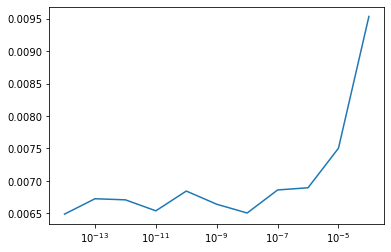

In [5]:
plt.semilogx(z,error)
plt.show()

#no augmented error
B_1=Ker(test,train1)
K_1=Ker(train1,train1)
M=len(train1)
I_2=np.identity(M)

z=[10**(-10),10**(-9),10**(-8),10**(-7),10**(-6), 10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0)]
for R in z:
    print('R=',R)
    K_2=np.matrix(K_1)+M*R*I_2



    Kinv=np.linalg.inv(K_2)


    Y=ytrain1.reshape(len(ytrain1),1)
    temp1=np.matmul(B_1,Kinv)
    temp2=np.matmul(temp1,Y)

    y_bar=np.average(Ytest)

    ybar=np.multiply(np.ones(n),y_bar)
    num=0
    den=0
    y_pred1=temp2
    y_pred2=np.ravel(y_pred1)
    te = np.where(y_pred2<0, -np.ones_like(y_pred2), np.ones_like(y_pred2))
    mis=[]
    for i in range(len(Ytest)):
        if np.sign(temp2[i])!=np.sign(Ytest[i]):
            mis.append(i)
        
    #num = np.linalg.norm(te - Ytest)**2
    #den = np.linalg.norm(ybar-Ytest)**2
    #errors=(num/den)
    #print('misclassification=',mis)
    print(len(mis))
    print(mean_squared_error(y_pred2,Ytest))